# Alaskan Forest Fires Case Study
* This case study analyzes data for forest fires in the US from 1992 to 2015.
* The data comes from US Forest Service of the US Department of Agriculture.

In [3]:
# Begin with the regular set up. Import all libraries. 

import numpy as np 
import pandas as pd 
import geopandas as geo
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/murach-exercises/gold.csv
/kaggle/input/murach-exercises/scanner_data.csv
/kaggle/input/murach-exercises/ramen-ratings.csv
/kaggle/input/murach-exercises/avocado.csv
/kaggle/input/murach-exercises/president_polls_2016.csv
/kaggle/input/murach-exercises/exams.csv
/kaggle/input/murach-exercises/fires_clean.pkl
/kaggle/input/murach-exercises/Maps/states.shp.xml
/kaggle/input/murach-exercises/Maps/states.dbf
/kaggle/input/murach-exercises/Maps/states.prj
/kaggle/input/murach-exercises/Maps/states.shp
/kaggle/input/murach-exercises/Maps/states.shx
/kaggle/input/murach-exercises/Maps/states.sbn
/kaggle/input/murach-exercises/Maps/states.sbx
/kaggle/input/murach-exercises/data/mortality.csv
/kaggle/input/murach-exercises/data/download_more_data.ipynb
/kaggle/input/murach-exercises/data/test_anaconda.ipynb
/kaggle/input/murach-exercises/data/cars.csv
/kaggle/input/murach-exercises/data/president_polls_2016.csv
/kaggle/input/murach-exercises/data/shots.json
/kaggle/input/murach-ex

In [4]:
#import the file data
fires = pd.read_pickle('/kaggle/input/murach-exercises/fires_clean.pkl')

In [5]:
# review info
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274123 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128667 non-null  object        
 1   acres_burned    274123 non-null  float64       
 2   state           274123 non-null  object        
 3   latitude        274123 non-null  float64       
 4   longitude       274123 non-null  float64       
 5   fire_year       274123 non-null  int64         
 6   discovery_date  274123 non-null  datetime64[ns]
 7   contain_date    137376 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.8+ MB


In [6]:
# filter the data so it only contains fires for Alaska. Hint: the abbreviation for Alaska is AK
ak_fires = fires[fires['state']=='AK']


In [7]:
# filter the data so it only contains fires that burned at least 90 days and at least 100 acres
# create duration col
fires['duration'] = (fires['contain_date'] - fires['discovery_date']).dt.days
ak_fires['duration']=(ak_fires['contain_date'] - ak_fires['discovery_date']).dt.days

long_big_fires = fires[(fires['acres_burned'] >= 100) & (fires['duration'] >= 90)]


big_ak= ak_fires[(ak_fires['acres_burned'] >= 100) & (ak_fires['duration'] >= 90)]
print(long_big_fires.head())
print(big_ak.head())

             fire_name  acres_burned state   latitude   longitude  fire_year  \
1505              Fork       11936.0    NM  33.613333 -108.558889       2005   
3597    Lodgepole Hump        1981.5    ID  46.696111 -114.901389       2005   
3751       Beaver Jack        7244.4    ID  45.730278 -114.706667       2005   
3989         Elk Creek        1335.0    ID  45.974722 -114.885833       2005   
4555  Lower Burn Creek        1086.0    ID  45.599167 -114.682500       2005   

     discovery_date contain_date  duration  
1505     2005-05-29   2005-08-29      92.0  
3597     2005-07-30   2005-10-31      93.0  
3751     2005-08-01   2005-10-31      91.0  
3989     2005-07-31   2005-10-30      91.0  
4555     2005-08-01   2005-10-31      91.0  
        fire_name  acres_burned state  latitude  longitude  fire_year  \
210516     332248       36250.0    AK   65.7995  -149.7192       1993   
210546    3322292       47494.0    AK   66.1164  -142.8692       1993   
210831     404275       43329.

/tmp/ipykernel_33/76129604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ak_fires['duration']=(ak_fires['contain_date'] - ak_fires['discovery_date']).dt.days


In [8]:
# find the outliers in the days_burning column

print(fires['duration'].describe())
print(big_ak['duration'].describe())

count    137376.000000
mean          3.254520
std          16.052833
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1881.000000
Name: duration, dtype: float64
count     235.000000
mean      111.531915
std        66.788815
min        90.000000
25%        97.000000
50%       103.000000
75%       113.500000
max      1101.000000
Name: duration, dtype: float64


In [9]:
# filter the data to remove rows that have outliers in the days_burning column
no_out = fires[fires['duration'] <= fires['duration'].std() * 3]
bc_ak = big_ak[big_ak['duration'] <= big_ak['duration'].std() * 3]
# display the first five rows
print(no_out.head())
print(bc_ak.head())

       fire_name  acres_burned state   latitude   longitude  fire_year  \
16         Power       16823.0    CA  38.523333 -120.211667       2004   
17         Freds        7700.0    CA  38.780000 -120.260000       2004   
25      Bachelor          10.0    NM  33.315833 -105.512222       2004   
37    Howard Gap          50.3    NC  35.000278  -83.351111       2005   
39  Austin Creek         125.0    NC  36.001667  -81.590000       2005   

   discovery_date contain_date  duration  
16     2004-10-06   2004-10-21      15.0  
17     2004-10-13   2004-10-17       4.0  
25     2004-07-20   2004-07-20       0.0  
37     2005-01-27   2005-01-28       1.0  
39     2005-02-12   2005-02-13       1.0  
        fire_name  acres_burned state  latitude  longitude  fire_year  \
210516     332248       36250.0    AK   65.7995  -149.7192       1993   
210546    3322292       47494.0    AK   66.1164  -142.8692       1993   
210831     404275       43329.7    AK   62.7827  -155.4190       1994   
21085

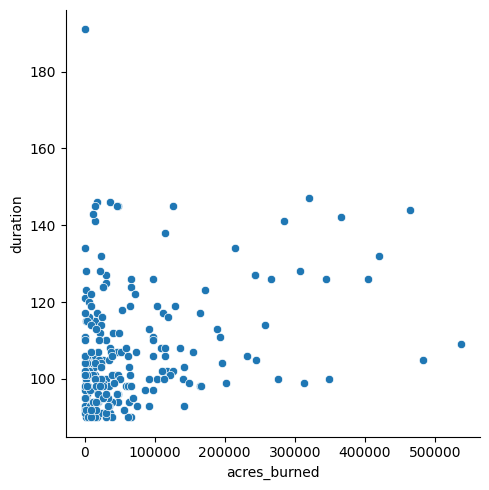

In [10]:
# create a scatterplot that compares acres burned with days burning
sns.relplot(data=bc_ak, x='acres_burned', y='duration', kind='scatter')
# add a title for the plot and labels for the x and y axes

In [11]:
# use Geopandas to read the shapes of the maps for the United States
US = geo.read_file('/kaggle/input/murach-exercises/Maps/states.shp')
print(US.columns)

Index(['STATE_NAME', 'DRAWSEQ', 'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR',
       'geometry'],
      dtype='object')


<Axes: >

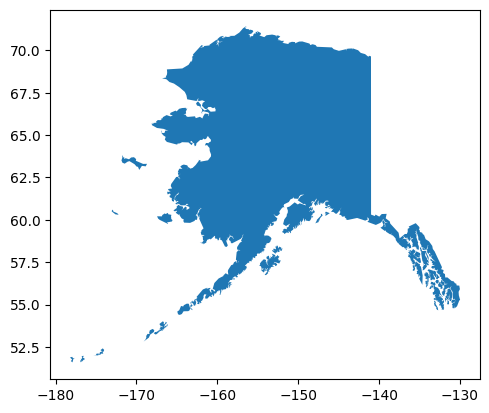

In [12]:
# plot an outline of the map of Alaska

AK = US[US['STATE_ABBR'] == 'AK']
AK.plot()

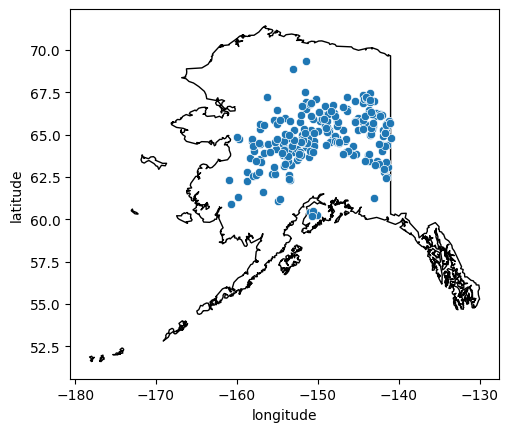

In [13]:
# plot the fires on the outline map with Seaborn
AK.plot(color='white', edgecolor='black')
ax = sns.scatterplot(data=bc_ak, x='longitude', y='latitude')

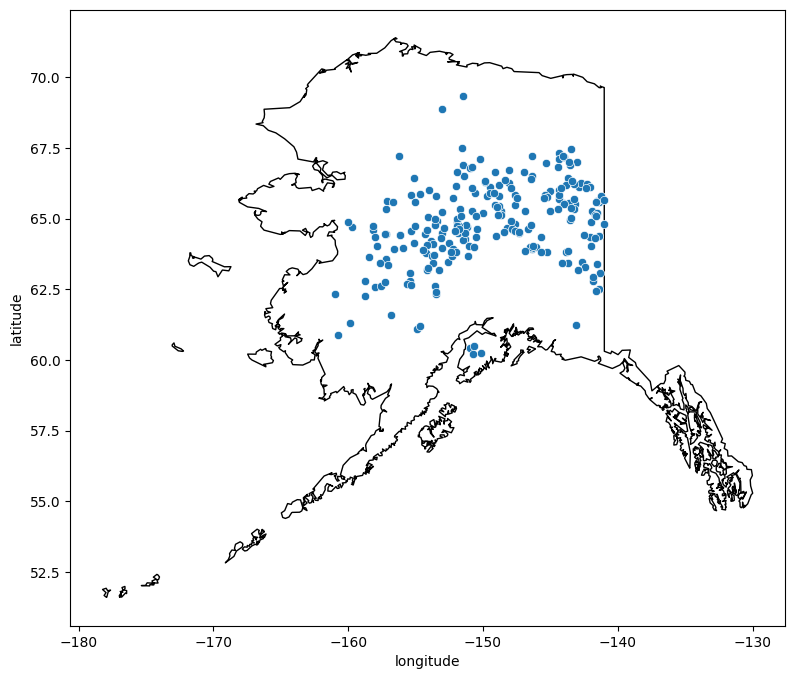

In [14]:
# increase the size of the plot
AK.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=bc_ak, x='longitude', y='latitude')

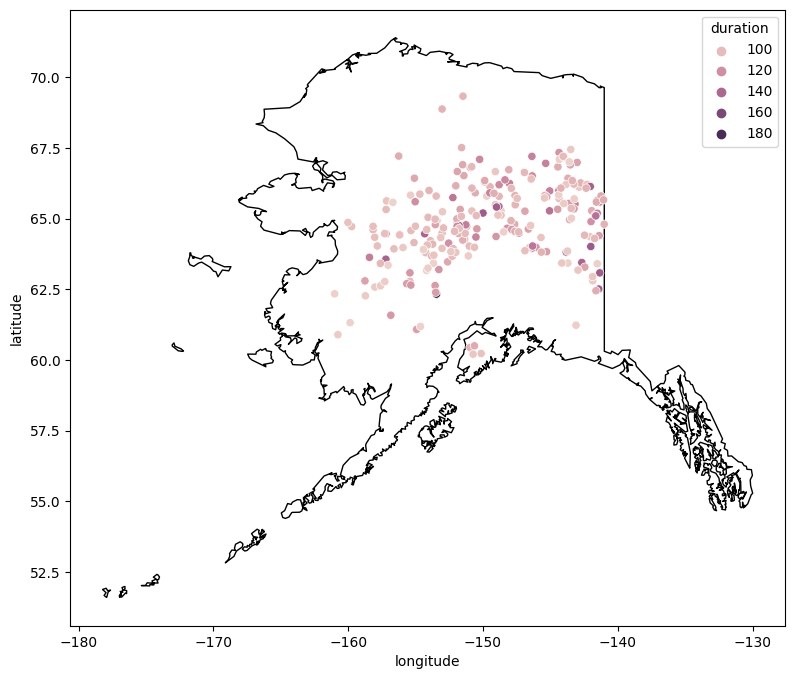

In [15]:
# modify the plot to change dot color with the number of days the fire has been burning
AK.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=bc_ak, x='longitude', y='latitude', hue='duration')

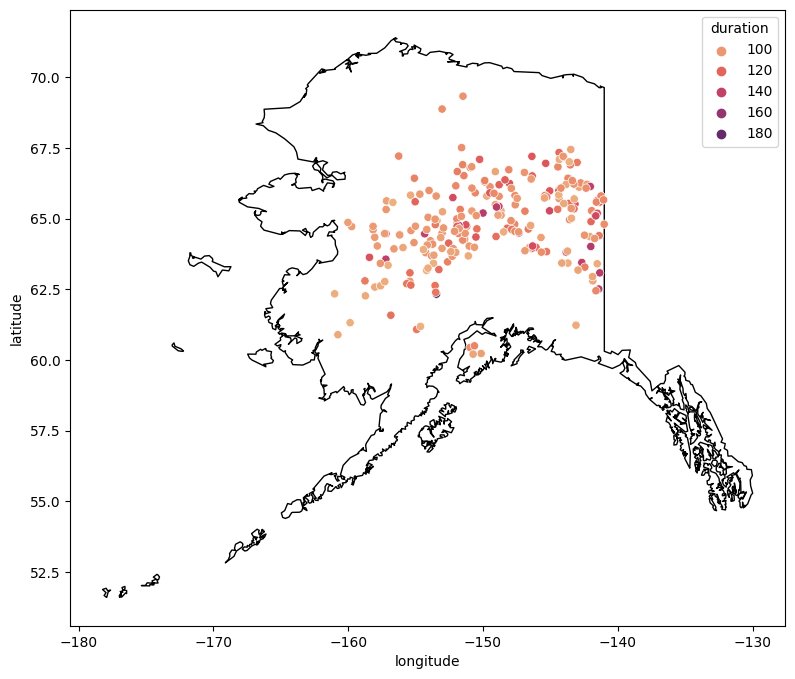

In [16]:
# modify the plot to use shades of red for the dot color
AK.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=bc_ak, x='longitude', y='latitude', hue='duration', palette = 'flare')

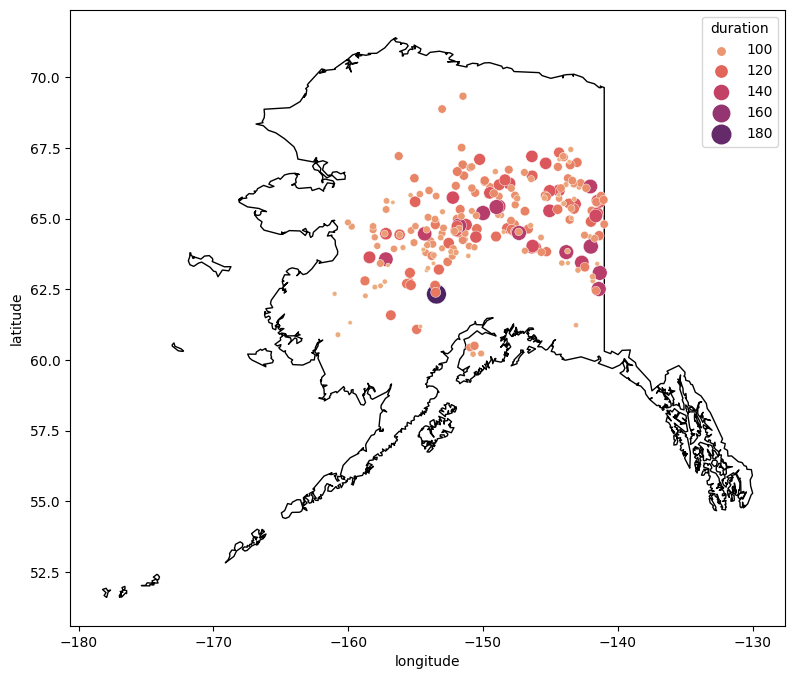

In [17]:
# modify the plot to change the size of the dots depending on the number of days burning
AK.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=bc_ak, x='longitude', y='latitude', hue='duration', palette = 'flare', size='duration', sizes=(10,200))